<a href="https://colab.research.google.com/github/TevinMusau/Machine_Learning_Group_1_Task_2/blob/main/Group1_ML_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **121058 Faith Sanne Odhiambo**

In [ ]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LassoCV
from google.colab import files

1. Getting the Dataset
- Upload the dataset

In [ ]:

uploaded = files.upload()

Read the dataset with Pandas library

In [ ]:
dataset = pd.read_csv("/content/modified_data.csv")

In [ ]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


Read the first two rows

In [ ]:
dataset.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500


Check shape of dataset (Matrix form, i.e., m*n)

*   List item
*   List item




In [ ]:
dataset.shape

(1460, 77)

Drop 'Id' column (Doesn't give any info. Would not be useful to the model during training)

In [ ]:
dataset.drop('Id', inplace=True, axis=1)

In [ ]:
dataset.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500


Getting the size of the dataset

In [ ]:
len(dataset)

1460

Getting the number of features in the dataset

In [ ]:
dataset.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

In [ ]:
features_original = list(dataset.columns)
len(features_original)

76

# **115325 - Dennis Koech Kipkorir**



In [ ]:
dataset.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

In [ ]:
features_with_missing=list(dataset.columns[dataset.isna().any()])
features_with_missing, len(features_with_missing)

(['LotFrontage',
  'MasVnrType',
  'MasVnrArea',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Electrical',
  'FireplaceQu',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageQual',
  'GarageCond'],
 15)

2. Filling in the Values for the Missing Features
- Get the % number of cells which have null values for each feature
- if the datatype of the feature is float, use mean_fill strategy, else, use bfill strategy

In [ ]:
for feature in features_with_missing:
  print(feature, ' ', dataset[feature].isna().sum()/len(dataset)*100)

LotFrontage   17.73972602739726
MasVnrType   0.547945205479452
MasVnrArea   0.547945205479452
BsmtQual   2.5342465753424657
BsmtCond   2.5342465753424657
BsmtExposure   2.6027397260273974
BsmtFinType1   2.5342465753424657
BsmtFinType2   2.6027397260273974
Electrical   0.0684931506849315
FireplaceQu   47.26027397260274
GarageType   5.5479452054794525
GarageYrBlt   5.5479452054794525
GarageFinish   5.5479452054794525
GarageQual   5.5479452054794525
GarageCond   5.5479452054794525


In [ ]:
mean_fill=['LotFrontage','MasVnrArea']
bfill=['FireplaceQu']
ffill=list(set(features_with_missing)-set(mean_fill)-set(bfill))

Using the Mean Fill Strategy
-> takes the mean of the remaining values in the column

In [ ]:
for feature in mean_fill:
  dataset[feature].fillna(dataset[feature].mean(),inplace=True)

In [ ]:
dataset['GarageYrBlt'].fillna(method='bfill', inplace=True)

Using the Bfill Strategy
- Backwards fill Strategy
- When axis=rows, value in the next row is used to fill current na values in row
- When axis=columns, value in the next column of the same row is used to fill current na value of the column

In [ ]:
for feature in bfill:
  dataset[feature].fillna(method='bfill', inplace = True)

Check if there are any features with empty values

In [ ]:
dataset.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

3. Encoding the Dataset
- Entails converting labels to a numeric form to convert them to machine readable form.

Get a list of the categorical features

In [ ]:
categorical_features = dataset.select_dtypes(include=['object']).copy()
categorical_features

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal


In [ ]:
categorical_features = list(categorical_features.columns)
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

Get a list of numerical features

In [ ]:
numerical = list(set(features_original)-set(categorical_features))
numerical

['BsmtFinSF2',
 'MiscVal',
 '2ndFlrSF',
 'GarageYrBlt',
 'Fireplaces',
 'BedroomAbvGr',
 'GarageArea',
 'BsmtHalfBath',
 'WoodDeckSF',
 'MasVnrArea',
 'SalePrice',
 'HalfBath',
 'LowQualFinSF',
 'MoSold',
 'OverallCond',
 'GrLivArea',
 '3SsnPorch',
 'LotFrontage',
 'MSSubClass',
 'OpenPorchSF',
 'YearBuilt',
 'LotArea',
 'FullBath',
 'OverallQual',
 'PoolArea',
 '1stFlrSF',
 'ScreenPorch',
 'TotalBsmtSF',
 'EnclosedPorch',
 'YearRemodAdd',
 'BsmtFullBath',
 'YrSold',
 'BsmtUnfSF',
 'GarageCars',
 'BsmtFinSF1',
 'KitchenAbvGr',
 'TotRmsAbvGrd']

Set Target

In [ ]:
target = ['SalePrice']

In [ ]:
nominal=['MSZoning','LandContour','LotConfig','Neighborhood']
ordinal = list(set(categorical_features) -  set(nominal))

In [ ]:
ordinal

['LotShape',
 'BsmtFinType2',
 'BsmtExposure',
 'Foundation',
 'BsmtFinType1',
 'RoofMatl',
 'Street',
 'FireplaceQu',
 'Heating',
 'HeatingQC',
 'SaleCondition',
 'BsmtQual',
 'KitchenQual',
 'ExterCond',
 'ExterQual',
 'RoofStyle',
 'Exterior1st',
 'PavedDrive',
 'Electrical',
 'HouseStyle',
 'BsmtCond',
 'BldgType',
 'CentralAir',
 'Exterior2nd',
 'GarageQual',
 'LandSlope',
 'MasVnrType',
 'Condition2',
 'Condition1',
 'GarageType',
 'GarageFinish',
 'Functional',
 'SaleType',
 'Utilities',
 'GarageCond']

In [ ]:
target = ['SalePrice']

In [ ]:
nominal=['MSZoning','LandContour','LotConfig','Neighborhood']
ordinal = list(set(categorical_features) -  set(nominal))

In [ ]:
ordinal

['LotShape',
 'BsmtFinType2',
 'BsmtExposure',
 'Foundation',
 'BsmtFinType1',
 'RoofMatl',
 'Street',
 'FireplaceQu',
 'Heating',
 'HeatingQC',
 'SaleCondition',
 'BsmtQual',
 'KitchenQual',
 'ExterCond',
 'ExterQual',
 'RoofStyle',
 'Exterior1st',
 'PavedDrive',
 'Electrical',
 'HouseStyle',
 'BsmtCond',
 'BldgType',
 'CentralAir',
 'Exterior2nd',
 'GarageQual',
 'LandSlope',
 'MasVnrType',
 'Condition2',
 'Condition1',
 'GarageType',
 'GarageFinish',
 'Functional',
 'SaleType',
 'Utilities',
 'GarageCond']

Encode the nominal data using Get Dummies Encoding

In [ ]:
df_nominal = pd.get_dummies(dataset[nominal])

In [ ]:
dataset[ordinal]

,LotShape,BsmtFinType2,BsmtExposure,Foundation,BsmtFinType1,RoofMatl,Street,FireplaceQu,Heating,HeatingQC,...,LandSlope,MasVnrType,Condition2,Condition1,GarageType,GarageFinish,Functional,SaleType,Utilities,GarageCond
0,Reg,Unf,No,PConc,GLQ,CompShg,Pave,TA,GasA,Ex,...,Gtl,BrkFace,Norm,Norm,Attchd,RFn,Typ,WD,AllPub,TA
1,Reg,Unf,Gd,CBlock,ALQ,CompShg,Pave,TA,GasA,Ex,...,Gtl,None,Norm,Feedr,Attchd,RFn,Typ,WD,AllPub,TA
2,IR1,Unf,Mn,PConc,GLQ,CompShg,Pave,TA,GasA,Ex,...,Gtl,BrkFace,Norm,Norm,Attchd,RFn,Typ,WD,AllPub,TA
3,IR1,Unf,No,BrkTil,ALQ,CompShg,Pave,Gd,GasA,Gd,...,Gtl,None,Norm,Norm,Detchd,Unf,Typ,WD,AllPub,TA
4,IR1,Unf,Av,PConc,GLQ,CompShg,Pave,TA,GasA,Ex,...,Gtl,BrkFace,Norm,Norm,Attchd,RFn,Typ,WD,AllPub,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Unf,No,PConc,Unf,CompShg,Pave,TA,GasA,Ex,...,Gtl,None,Norm,Norm,Attchd,RFn,Typ,WD,AllPub,TA
1456,Reg,Rec,No,CBlock,ALQ,CompShg,Pave,TA,GasA,TA,...,Gtl,Stone,Norm,Norm,Attchd,Unf,Min1,WD,AllPub,TA
1457,Reg,Unf,No,Stone,GLQ,CompShg,Pave,Gd,GasA,Ex,...,Gtl,None,Norm,Norm,Attchd,RFn,Typ,WD,AllPub,TA
1458,Reg,Rec,Mn,CBlock,GLQ,CompShg,Pave,NaN,GasA,Gd,...,Gtl,None,Norm,Norm,Attchd,Unf,Typ,WD,AllPub,TA


In [ ]:
for feature in ordinal:
  dataset[feature] = dataset[feature].astype('category').cat.codes

In [ ]:
df_ordinal = dataset[ordinal]

In [ ]:
df_ordinal

,LotShape,BsmtFinType2,BsmtExposure,Foundation,BsmtFinType1,RoofMatl,Street,FireplaceQu,Heating,HeatingQC,...,LandSlope,MasVnrType,Condition2,Condition1,GarageType,GarageFinish,Functional,SaleType,Utilities,GarageCond
0,3,5,3,2,2,1,1,4,1,0,...,0,1,2,2,1,1,6,8,0,4
1,3,5,1,1,0,1,1,4,1,0,...,0,2,2,1,1,1,6,8,0,4
2,0,5,2,2,2,1,1,4,1,0,...,0,1,2,2,1,1,6,8,0,4
3,0,5,3,0,0,1,1,2,1,2,...,0,2,2,2,5,2,6,8,0,4
4,0,5,0,2,2,1,1,4,1,0,...,0,1,2,2,1,1,6,8,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,5,3,2,5,1,1,4,1,0,...,0,2,2,2,1,1,6,8,0,4
1456,3,4,3,1,0,1,1,4,1,4,...,0,3,2,2,1,2,2,8,0,4
1457,3,5,3,4,2,1,1,2,1,0,...,0,2,2,2,1,1,6,8,0,4
1458,3,4,2,1,2,1,1,-1,1,2,...,0,2,2,2,1,2,6,8,0,4


In [ ]:
dataset[numerical]

,BsmtFinSF2,MiscVal,2ndFlrSF,GarageYrBlt,Fireplaces,BedroomAbvGr,GarageArea,BsmtHalfBath,WoodDeckSF,MasVnrArea,...,TotalBsmtSF,EnclosedPorch,YearRemodAdd,BsmtFullBath,YrSold,BsmtUnfSF,GarageCars,BsmtFinSF1,KitchenAbvGr,TotRmsAbvGrd
0,0,0,854,2003.0,0,3,548,0,0,196.0,...,856,0,2003,1,2008,150,2,706,1,8
1,0,0,0,1976.0,1,3,460,1,298,0.0,...,1262,0,1976,0,2007,284,2,978,1,6
2,0,0,866,2001.0,1,3,608,0,0,162.0,...,920,0,2002,1,2008,434,2,486,1,6
3,0,0,756,1998.0,1,3,642,0,0,0.0,...,756,272,1970,1,2006,540,3,216,1,7
4,0,0,1053,2000.0,1,4,836,0,192,350.0,...,1145,0,2000,1,2008,490,3,655,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,694,1999.0,1,3,460,0,0,0.0,...,953,0,2000,0,2007,953,2,0,1,7
1456,163,0,0,1978.0,2,3,500,0,349,119.0,...,1542,0,1988,1,2010,589,2,790,1,7
1457,0,2500,1152,1941.0,2,4,252,0,0,0.0,...,1152,0,2006,0,2010,877,1,275,1,9
1458,1029,0,0,1950.0,0,2,240,0,366,0.0,...,1078,112,1996,1,2010,0,1,49,1,5


Finally, create the new encoded dataset
- concatanate norminal, ordinal and numerical data

In [ ]:
df_numerical = dataset[numerical]

In [ ]:
new_data = pd.concat([df_nominal, df_ordinal, df_numerical], axis = 1)

In [ ]:
new_data.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,...,TotalBsmtSF,EnclosedPorch,YearRemodAdd,BsmtFullBath,YrSold,BsmtUnfSF,GarageCars,BsmtFinSF1,KitchenAbvGr,TotRmsAbvGrd
0,0,0,0,1,0,0,0,0,1,0,...,856,0,2003,1,2008,150,2,706,1,8
1,0,0,0,1,0,0,0,0,1,0,...,1262,0,1976,0,2007,284,2,978,1,6
2,0,0,0,1,0,0,0,0,1,0,...,920,0,2002,1,2008,434,2,486,1,6


In [ ]:
new_data.shape

(1460, 111)

# 118640 Tevin Musau Mutua

4. Standardize the Dataset (Data Normalization)
- Involves rescaling value distribution so that the mean of observed values is 0 and the standard deviation is 1
- The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.

In [ ]:
new_data.drop('SalePrice', axis = 1, inplace = True)

Convert the new dataset to an N-D array

In [ ]:
y = dataset[target]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
y.shape

(1460, 1)

In [ ]:
x = new_data.to_numpy()

In [ ]:
x.shape

(1460, 110)

In [ ]:
py.isnan(x.any())

False

In [ ]:
py.all(py.isfinite(x))

True

In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
x.shape

(1460, 110)

In [ ]:
x[0]

array([-0.08304548, -0.21585871, -0.10526316,  0.51813339, -0.41895507,
       -0.21235968, -0.18831089, -0.15899968,  0.33712564, -0.46873869,
       -0.26232433, -0.18238027, -0.05241424,  0.62276215, -0.10854037,
       -0.03703704, -0.10526316, -0.20339487, -0.1398323 ,  2.95522137,
       -0.19025216, -0.27116307, -0.23917551, -0.16124951, -0.10854037,
       -0.1863522 , -0.42683279, -0.07875671, -0.22941573, -0.16998114,
       -0.23595776, -0.28963792, -0.13199092, -0.23106504, -0.20521398,
       -0.25018188, -0.13199092, -0.16347148, -0.08712888,  0.75073056,
        0.33985263,  0.65814837,  0.83559903, -0.33648812, -0.12579688,
        0.06423821,  1.11571093, -0.12304604, -0.88465767,  0.2085023 ,
       -0.17911454, -0.40936914,  0.36420746, -0.77797579, -0.49151573,
        0.74309239,  0.28974476,  0.30361622,  1.02668924,  0.32153013,
       -0.41169079,  0.26381257,  0.75162623,  0.32138923, -0.22571613,
       -1.15326332, -0.03174026, -0.03628912, -0.58050962, -0.06

Set the target as variable y

Convert target to an N-D Array

In [ ]:
y = y.to_numpy()

In [ ]:
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [ ]:
y.shape

(1460, 1)

Standardize y

In [ ]:
y = StandardScaler().fit_transform(y)

In [ ]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

5. Feature Extraction Using PCA (PCA Dimensionality Reduction)

Setting number of Principle components

In [ ]:
py.isnan(x.any())

False

In [ ]:
pca = (PCA(n_components=2))

In [ ]:
p_components=pca.fit_transform(x)

In [ ]:
pca.explained_variance_ratio_

array([0.09850179, 0.0428678 ])

In [ ]:
pca_data = pd.DataFrame(p_components,columns=['PC1','PC2'])
target_data = pd.DataFrame(y,columns=['SalePrice'])
final_data = pd.concat([pca_data,target_data],axis=1)
final_data

,PC1,PC2,SalePrice
0,2.405864,-1.495338,0.347273
1,0.294922,2.391549,0.007288
2,2.804787,-1.009049,0.536154
3,-1.078273,0.980757,-0.515281
4,5.318285,-0.153793,0.869843
...,...,...,...
1455,1.315382,-2.269601,-0.074560
1456,1.161638,3.166082,0.366161
1457,1.309392,-0.571510,1.077611
1458,-2.798348,2.891064,-0.488523


In [ ]:
X=p_components

# 118300 - Kenneth Temba

6. Perform feature selection using L1

In [ ]:
regressor = LassoCV()

In [ ]:
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [ ]:
regressor.coef_

array([0.25893304, 0.02785946])

In [ ]:
regressor.intercept_

2.1664348856945456e-16

Example Plot

In [ ]:
final_data_array = final_data.to_numpy()

In [ ]:
min_val = py.min(final_data_array, axis=0)
max_val = py.max(final_data_array, axis=0)
X_plot,Y_plot = py.meshgrid(py.linspace(min_val[0], max_val[0], 20), py.linspace(min_val[1], max_val[1], 20))

In [ ]:
w_1 = regressor.coef_[0]
w_2 = regressor.coef_[1]
b = regressor.intercept_
Z_plot = w_1*X_plot + w_2*Y_plot + b

Text(0.5, 0.92, 'Plane of Best Fit')

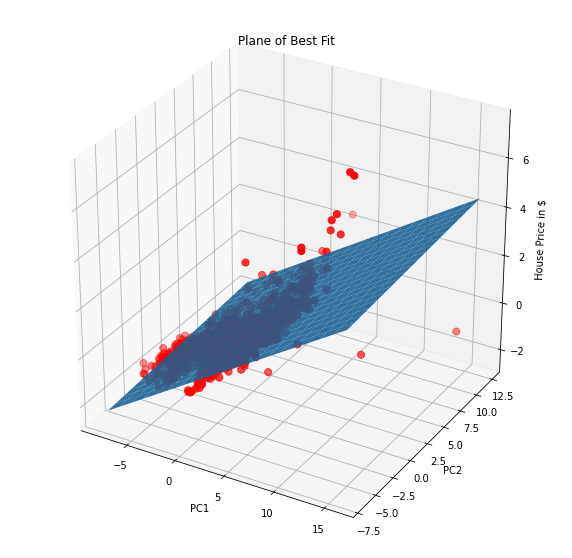

In [ ]:
fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X_plot, Y_plot, Z_plot, rstride=1, cstride=1, alpha=0.9)
ax.scatter(final_data_array[:,0], final_data_array[:,1], final_data_array[:,2], c='r', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('House Price in $')
ax.set_title("Plane of Best Fit")